## Basic Python commands

### Create a new conda environment called jupyter with correct packages
- conda create -n jupyter -c conda-forge jupyterlab nb_conda_kernels

### Run jupyter notebook with right environment set up
- Open folder and run cmd
- conda activate jupyter
- jupyter notebook

### Helpful Commands
- SHIFT + TAB in jupyter to see function params

### #TODO:
- Pivot longer and Pivot wider
- Object Oriented Programming (OOP)
- Data structures: https://docs.python.org/3/tutorial/datastructures.html
- Dataclasses: https://docs.python.org/3/library/dataclasses.html

In [5]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [6]:
# Set-up
project_folder_path = os.getcwd()
sample_data_folder_path = os.path.join(project_folder_path, "sample_data")

In [7]:
# Read data
raw_data = pd.read_csv(os.path.join(sample_data_folder_path, "mtcars.csv"))
raw_data.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
# Counts
print(f"The data frame has {raw_data.shape[0]} rows and {raw_data.shape[1]} columns")

The data frame has 32 rows and 12 columns


In [9]:
# Basic data transformation
raw_data = raw_data.rename(columns = {"car": "CarName", "mpg": "MilesPerGallon", "cyl": "Cylinders", "hp": "HorsePower", "wt": "Weight", "gear": "Gears"})
raw_data["CarName"] = raw_data["CarName"].astype(str)
raw_data["CarManufacturer"] = raw_data["CarName"].apply(lambda x: x.strip().split(" ")[0])
raw_data = raw_data[["CarManufacturer", "CarName", "MilesPerGallon", "Cylinders", "HorsePower", "Weight", "Gears"]]
raw_data.head()

,CarManufacturer,CarName,MilesPerGallon,Cylinders,HorsePower,Weight,Gears
0,Mazda,Mazda RX4,21.0,6,110,2.620,4
1,Mazda,Mazda RX4 Wag,21.0,6,110,2.875,4
2,Datsun,Datsun 710,22.8,4,93,2.320,4
3,Hornet,Hornet 4 Drive,21.4,6,110,3.215,3
4,Hornet,Hornet Sportabout,18.7,8,175,3.440,3


In [10]:
# Check data types
raw_data.dtypes

# Other functions
# raw_data.info()
# raw_data.describe()
# raw_data.isnull().sum()
# raw_data.corr()

CarManufacturer     object
CarName             object
MilesPerGallon     float64
Cylinders            int64
HorsePower           int64
Weight             float64
Gears                int64
dtype: object

In [11]:
# Filtering
raw_data[raw_data["Weight"] > 4]

,CarManufacturer,CarName,MilesPerGallon,Cylinders,HorsePower,Weight,Gears
11,Merc,Merc 450SE,16.4,8,180,4.070,3
14,Cadillac,Cadillac Fleetwood,10.4,8,205,5.250,3
15,Lincoln,Lincoln Continental,10.4,8,215,5.424,3
16,Chrysler,Chrysler Imperial,14.7,8,230,5.345,3


In [12]:
# Filtering by multiple criteria
raw_data[raw_data["CarManufacturer"].isin(["Mazda", "Datsun"])]

,CarManufacturer,CarName,MilesPerGallon,Cylinders,HorsePower,Weight,Gears
0,Mazda,Mazda RX4,21.0,6,110,2.620,4
1,Mazda,Mazda RX4 Wag,21.0,6,110,2.875,4
2,Datsun,Datsun 710,22.8,4,93,2.320,4


In [13]:
raw_data[raw_data["CarName"].str.contains("RX")]

,CarManufacturer,CarName,MilesPerGallon,Cylinders,HorsePower,Weight,Gears
0,Mazda,Mazda RX4,21.0,6,110,2.620,4
1,Mazda,Mazda RX4 Wag,21.0,6,110,2.875,4


In [14]:
(
    raw_data[(raw_data["Cylinders"] == 8) & (raw_data["MilesPerGallon"] > 15)]
    .sort_values(by = ["CarManufacturer", "MilesPerGallon"])
)

,CarManufacturer,CarName,MilesPerGallon,Cylinders,HorsePower,Weight,Gears
22,AMC,AMC Javelin,15.2,8,150,3.435,3
21,Dodge,Dodge Challenger,15.5,8,150,3.520,3
28,Ford,Ford Pantera L,15.8,8,264,3.170,5
4,Hornet,Hornet Sportabout,18.7,8,175,3.440,3
13,Merc,Merc 450SLC,15.2,8,180,3.780,3
11,Merc,Merc 450SE,16.4,8,180,4.070,3
12,Merc,Merc 450SL,17.3,8,180,3.730,3
24,Pontiac,Pontiac Firebird,19.2,8,175,3.845,3


In [15]:
# Grouping data
(
    raw_data.groupby("CarManufacturer")
    .mean(numeric_only=True)
    .sort_values("MilesPerGallon", ascending = False)
    .head(7)
)

# Other functions
# raw_data.groupby("CarManufacturer").describe()
# raw_data.groupby("CarManufacturer").count()
# raw_data.groupby("CarManufacturer").min()
# raw_data.groupby("CarManufacturer").max()
# raw_data.groupby("CarManufacturer").sum()

,MilesPerGallon,Cylinders,HorsePower,Weight,Gears
CarManufacturer,,,,,
Honda,30.40,4.0,52.0,1.6150,4.0
Lotus,30.40,4.0,113.0,1.5130,5.0
Fiat,29.85,4.0,66.0,2.0675,4.0
Toyota,27.70,4.0,81.0,2.1500,3.5
Porsche,26.00,4.0,91.0,2.1400,5.0
Datsun,22.80,4.0,93.0,2.3200,4.0
Volvo,21.40,4.0,109.0,2.7800,4.0


In [16]:
# Grouping with custom variables
(
    raw_data
    .groupby("CarManufacturer")
    .agg({
        "MilesPerGallon": ["mean", "count", "max", "sum"], 
        "HorsePower": ["mean"]
    })
    .head(5)
)

MilesPerGallon                   HorsePower
                          mean count   max   sum       mean
CarManufacturer                                            
AMC                       15.2     1  15.2  15.2      150.0
Cadillac                  10.4     1  10.4  10.4      205.0
Camaro                    13.3     1  13.3  13.3      245.0
Chrysler                  14.7     1  14.7  14.7      230.0
Datsun                    22.8     1  22.8  22.8       93.0

In [17]:
# Joins
df1 = pd.DataFrame([(1, "Alice"), (2, "Bob"), (3, "Charlie")], columns = ["CustomerId", "Name"])
df2 = pd.DataFrame([(1, 100), (2, 200), (3, 300)], columns = ["CustomerId", "Sales"])

joined_df = df1.merge(df2, on = "CustomerId")
joined_df
# joined_df = df1.merge(df2, on = "CustomerId", how = "inner") # only rows in common
# joined_df = df1.merge(df2, on = "CustomerId", how = "outer") # all rows from both
# joined_df = df1.merge(df2, on = "CustomerId", how = "left")  # all rows from left
# joined_df = df1.merge(df2, on = "CustomerId", how = "right") # all rows from right
# joined_df = df1.merge(df2, on = ["CustomerId", "Name"])

,CustomerId,Name,Sales
0,1,Alice,100
1,2,Bob,200
2,3,Charlie,300


In [18]:
# Concatenating
df3 = pd.DataFrame([(1, "Alice"), (2, "Bob"), (3, "Charlie")], columns = ["CustomerId", "Name"])
df4 = pd.DataFrame([(1, "Alice"), (2, "Bob"), (3, "Charlie")], columns = ["CustomerId", "Name"])

concat_df = pd.concat([df3, df4])
concat_df
# pd.concat([df1, df2], join = "inner") # only columns in common
# pd.concat([df1, df2], join = "outer") # all columns from both

,CustomerId,Name
0,1,Alice
1,2,Bob
2,3,Charlie
0,1,Alice
1,2,Bob
2,3,Charlie


<Axes: >

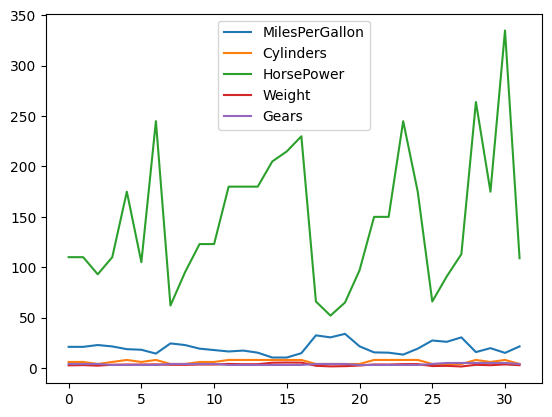

In [19]:
raw_data.plot()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

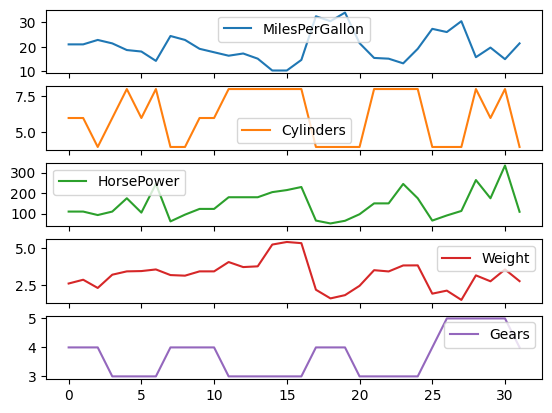

In [20]:
raw_data.plot(kind = "line", subplots = True)

<Axes: >

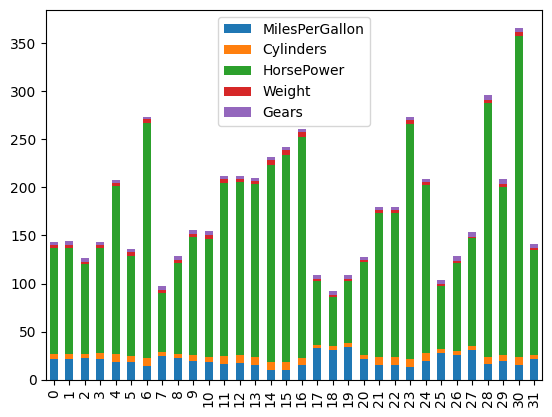

In [21]:
raw_data.plot(kind = "bar", stacked = True)

<Axes: >

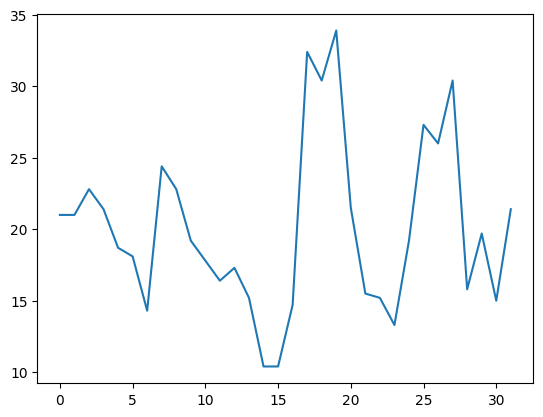

In [22]:
raw_data["MilesPerGallon"].plot(kind = "line")

<Axes: >

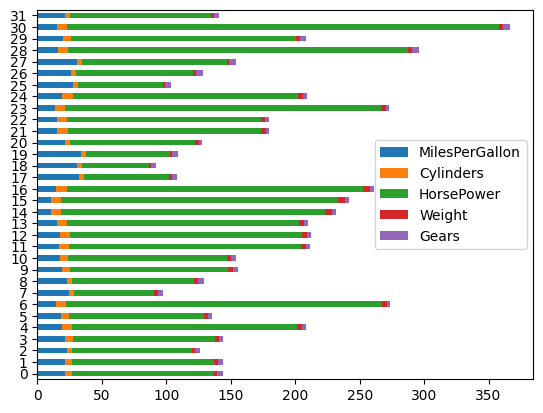

In [23]:
raw_data.plot.barh(stacked = True) # horizontal stacked bar chart

<Axes: xlabel='MilesPerGallon', ylabel='Weight'>

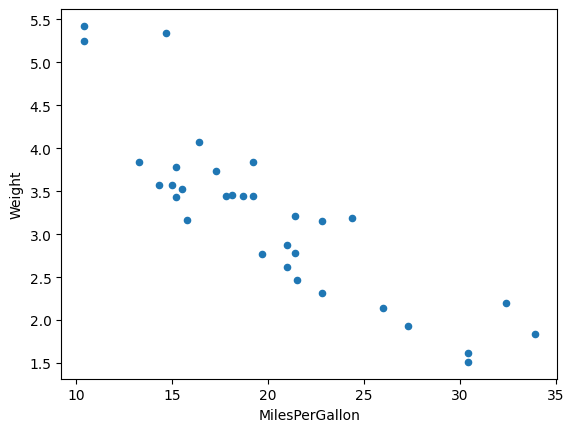

In [24]:
raw_data.plot.scatter(x = "MilesPerGallon", y = "Weight")

<Axes: ylabel='Frequency'>

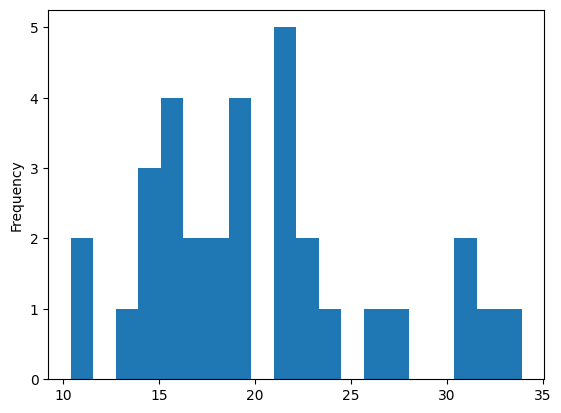

In [25]:
raw_data["MilesPerGallon"].plot.hist(bins = 20)

<Axes: >

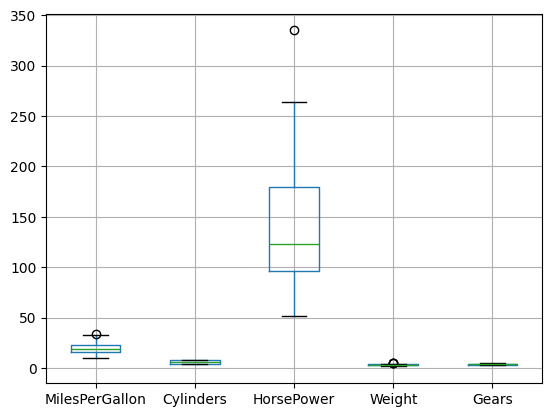

In [26]:
raw_data.boxplot()

In [27]:
# Chart styling
print(plt.style.available)
# plt.style.use("classic")
# plt.style.use("dark_background")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [28]:
# Duplicates
# df2 = df.drop_duplicates()
# df = df.drop(columns = ["ColumnA", "ColumnB"])

In [29]:
# Regex

# regex
# df["LastName"].str.strip()  # remove whitespace on outside
# df["LastName"].str.lstrip() # remove left whitespace
# df["LastName"].str.lstrip("...") # removes dots on left

# df["LastName"] = df["LastName"].str.lstrip("...")
# df["LastName"] = df["LastName"].str.lstrip("/")
# df["LastName"] = df["LastName"].str.rstrip("_")

# df["LastName"] = df["LastName"].str.rstrip("123._/") removes 123 . _ / symbols

# df["PhoneNumber"] = df["PhoneNumber"].str.replace("[^a-zA-Z0-9]", "") # replace anything except letters or numbers

# df["PhoneNumber"] = df["PhoneNumber"].apply(lambda x: str(x))

# df["PhoneNumber"].str.replace("NaN", "")

# df["PhoneNumber"] = df["PhoneNumber"].apply(lambda x: x[0:3] + '-' + x[3:6] + '-' + x[6:10])

In [30]:
# Ad-hoc analysis

# df[["StreetName", "TownName", "PostCode"]] = df["Address"].str.split(",", 2, expand = TRUE) # split up to 2 commas

# df["Flag"] = df["Flag"].str.replace("Yes", "Y")
# df["Flag"] = df["Flag"].str.replace("No", "N")

# df.str.replace("N/A", "") # global replace
# df.str.replace("NaN", "")
# df.fillna("")

# df = df.dropna(subset = "PhoneNumber", inplace = True)

# df.sort_values(by = "Population", ascending = False)

# df[df["Continent"].str.contains("Oceania")]

# df2 = df.groupby("Continent").mean().sort_values(by = "Population", ascending = False)
# df2.plot()

# # pivot
# df3 = df2.transpose()
# df3.plot()

# df.boxplot(figsize = (20, 10))